# Mean-shift clustering

Mean-Shift is a density-based models: These models define clusters by their density in the data space. Areas with a high density of data points will become clusters, which are typically separated from one another by low-density areas.

The algorithm works by modeling the data points as a distribution function, where high-density areas (high concentration of data points) represent high peaks. Then,
the general idea is to shift each data point until it reaches its nearest peak, which
becomes a cluster.

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import pandas as pd

# Model
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Plotting
import matplotlib.pyplot as plt

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
dataset = pd.read_csv(f"{data_path}/circles.csv")

<a id="exploring-data"></a>
## Exploring dataset

In [4]:
# Shape of the dataset
print("Shape of the dataset: ", dataset.shape)
# Head
dataset

Shape of the dataset:  (1500, 2)


0         1
0     0.393992 -0.416376
1     0.528243 -0.828242
2    -0.740158  0.607730
3    -0.971016  0.316821
4     0.018693 -0.605288
...        ...       ...
1495  0.085197 -0.463028
1496  0.890820  0.003483
1497  0.223768 -0.419122
1498  0.221189 -0.510314
1499  0.544376  0.049358

[1500 rows x 2 columns]

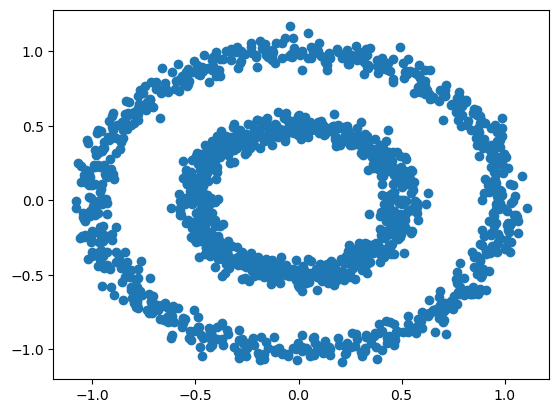

In [5]:
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1])
plt.show()

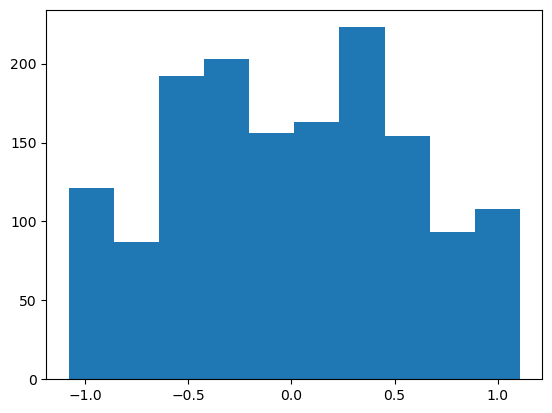

In [6]:
# Using slicing to select the feature
plt.hist(dataset.iloc[:, 0])
plt.show()

<a id="mean-shift></a>
## Mean-Shift

In [7]:
# The mean-shift algorithm does not the number of clusters specified.
# Bandwith can be fine-tuned to get the best performance. Train the
# model with a bandwidth of 0.5 - chosen after trying out 0.1 and 0.9.
est_meanshift = MeanShift(bandwidth=0.5)
# Fit to the data
est_meanshift.fit(dataset)
# Using the model to assign a cluster to each data point
pred_meanshift = est_meanshift.predict(dataset)

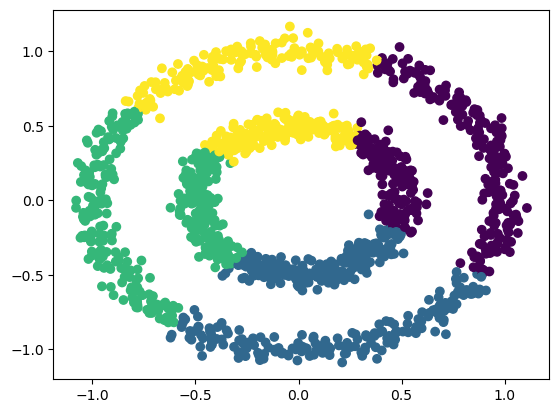

In [8]:
# Plot the data points into clusters
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=pred_meanshift)
plt.savefig(f"{assets_path}/circles-mean-shift.png", bbox_inches="tight")
plt.show()

<a id="metrics"></a>
## Metrics

In [9]:
# Silhouette
meanshift_silhouette_score = silhouette_score(
    dataset, pred_meanshift, metric="euclidean"
)
print(meanshift_silhouette_score)

0.3705351315933256


In [10]:
# Calinski_harabasz
meanshift_calinski_harabasz_score = calinski_harabasz_score(
    dataset, pred_meanshift
)
print(meanshift_calinski_harabasz_score)

1305.1425653034062
